# Project Introduction: Oil Well Profitability Analysis

This project evaluates the profitability of developing oil wells in three regions based on historical geological data. By training a linear regression model, we predict oil production volumes and estimate profits using bootstrapping. We factor in business constraints like budget and revenue per barrel to determine the minimum viable production. The analysis identifies the most profitable region, with a focus on risk assessment and financial viability.

In [5]:
#Loaded libraries 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState
import matplotlib.pyplot as plt
import seaborn as sns


# Loaded datasets
data_0 = pd.read_csv('geo_data_0 (2).csv')
data_1 = pd.read_csv('geo_data_1 (2).csv')
data_2 = pd.read_csv('geo_data_2 (3).csv')

# Display basic info
for i, data in enumerate([data_0, data_1, data_2]):
    print(f"\nRegion {i} Info:")
    print(data.info())
    print(data.describe())


Region 0 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362

In [6]:
display(data_0.head(3))

data_0.tail(3)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647


,id,f0,f1,f2,product
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764
99999,1CWhH,1.764754,-0.266417,5.722849,149.633246


In [7]:
for i, df in enumerate([data_0, data_1, data_2]):
    print(f"Region {i} Duplicates: {df.duplicated().sum()}")

Region 0 Duplicates: 0
Region 1 Duplicates: 0
Region 2 Duplicates: 0


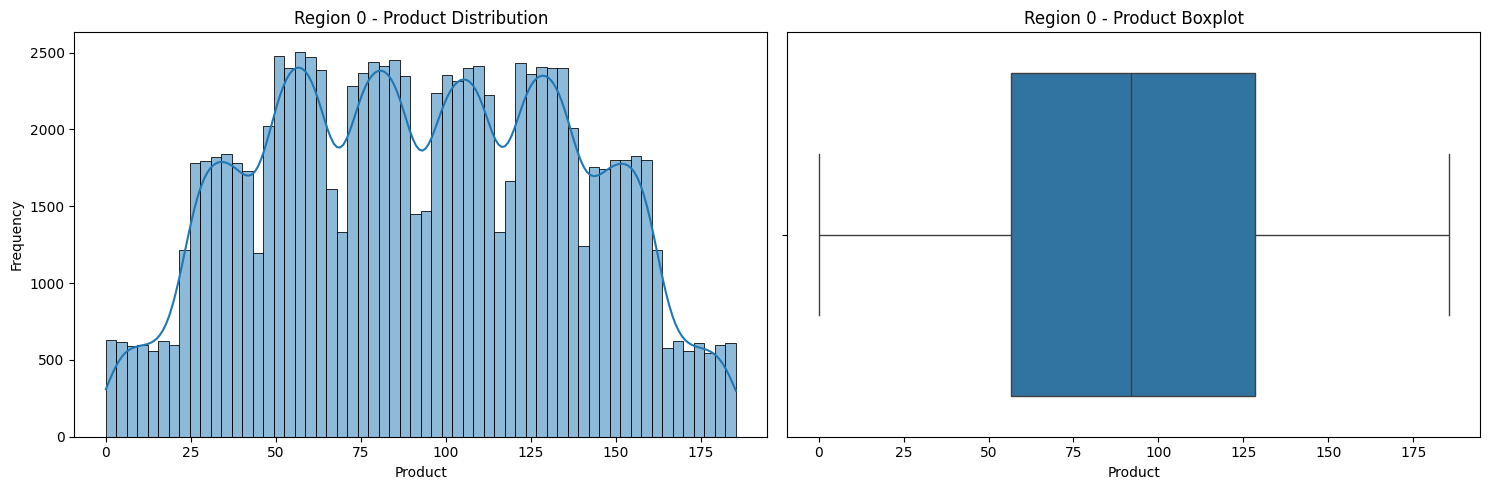

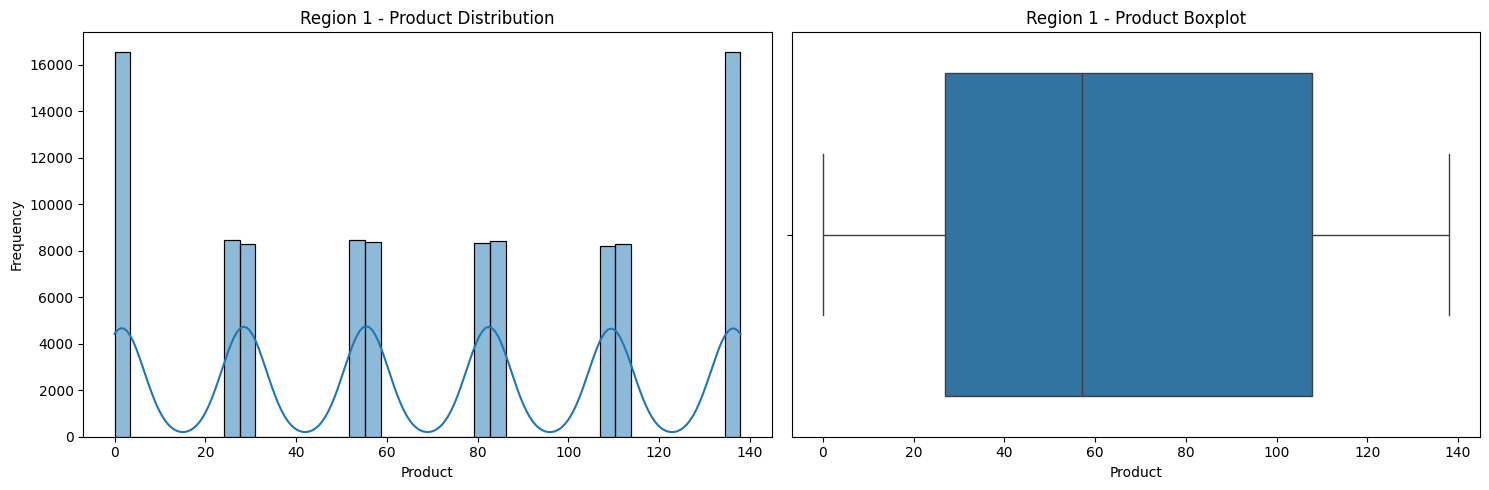

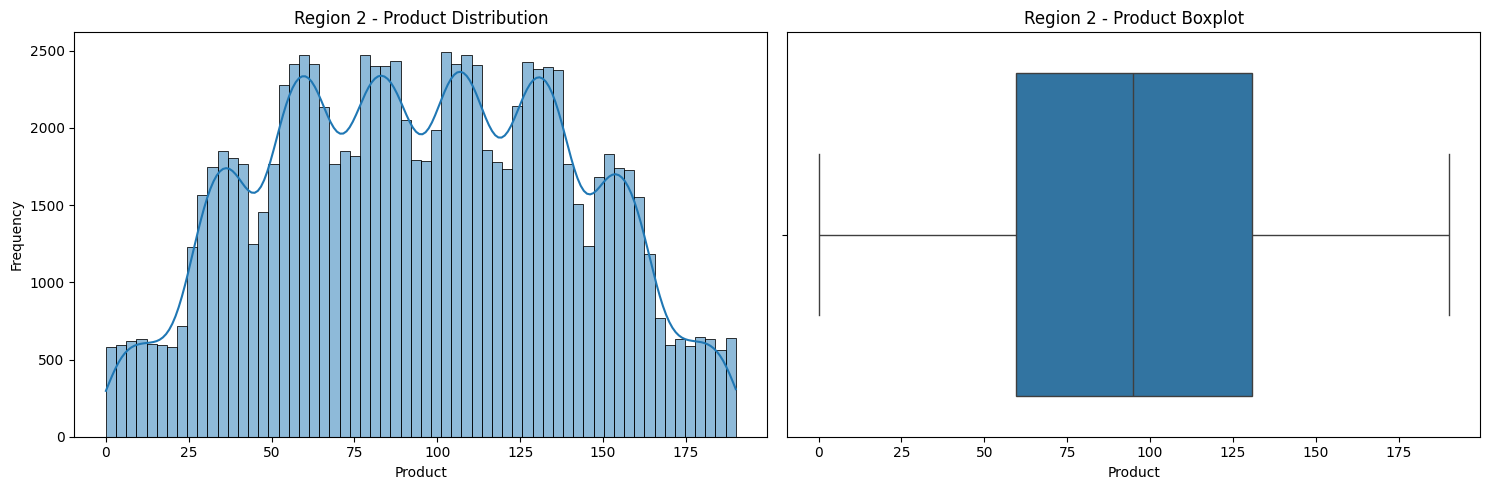

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

for i, df in enumerate([data_0, data_1, data_2]):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df['product'], kde=True)
    plt.title(f'Region {i} - Product Distribution')
    plt.xlabel('Product')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['product'])
    plt.title(f'Region {i} - Product Boxplot')
    plt.xlabel('Product')

    plt.tight_layout()
    plt.show()

Conclusion:

Region 0 and Region 2 have similar product distributions, with a wide and even spread across many products. This suggests a diverse and balanced use of products. In contrast, Region 1 has a more limited and clustered product use, focusing on specific products. This may indicate different customer preferences or business strategies in Region 1.